In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler

In [5]:
data_source = 'alphavantage'
symbol = 'MSFT'
if data_source == 'alphavantage':
    # ====================== Loading Data from Alpha Vantage ==================================
    api_key = 'TMRHA3C4KC3XW1S2'
    # American Airlines stock market prices
    ticker = symbol
    # JSON file with all the stock market data for AAL from the last 20 years
    url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)
    # Save data to this file
    file_to_save = 'stock_market_data-%s.csv'%ticker
    # If you haven't already saved data,
    # Go ahead and grab the data from the url
    # And store date, low, high, volume, close, open values to a Pandas DataFrame
    if not os.path.exists(file_to_save):
        with urllib.request.urlopen(url_string) as url:
            data = json.loads(url.read().decode())
            # extract stock market data
            data = data['Time Series (Daily)']
            df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
            for k,v in data.items():
                date = dt.datetime.strptime(k, '%Y-%m-%d')
                data_row = [date.date(),float(v['3. low']),float(v['2. high']),
                            float(v['4. close']),float(v['1. open'])]
                df.loc[-1,:] = data_row
                df.index = df.index + 1
        print('Data saved to : %s'%file_to_save)        
        df.to_csv(file_to_save)
    # If the data is already there, just load it from the CSV
    else:
        print('File already exists. Loading data from CSV')
        df = pd.read_csv(file_to_save)
else:
    # ====================== Loading Data from Kaggle ==================================
    # You will be using HP's data. Feel free to experiment with other data.
    # But while doing so, be careful to have a large enough dataset and also pay attention to the data normalization
    df = pd.read_csv(os.path.join('Stocks',symbol+'.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close'])
    print('Loaded data from the Kaggle repository')

Data saved to : stock_market_data-MSFT.csv


In [209]:
# Sort DataFrame by date
df = df.sort_values('Date')
df['Movement'] = ((df['Close'] - df['Open'])/df['Open'])
# Double check the result
df.tail()


,Date,Low,High,Close,Open,Movement
5230,2018-10-15,106.947,109.48,107.6,108.91,-0.0120283
5231,2018-10-16,108.95,111.41,111,109.54,0.0133285
5232,2018-10-17,109.548,111.81,110.71,111.68,-0.00868553
5233,2018-10-18,107.83,110.53,108.5,110.1,-0.0145322
5234,2018-10-19,108.21,110.86,108.66,108.93,-0.00247866


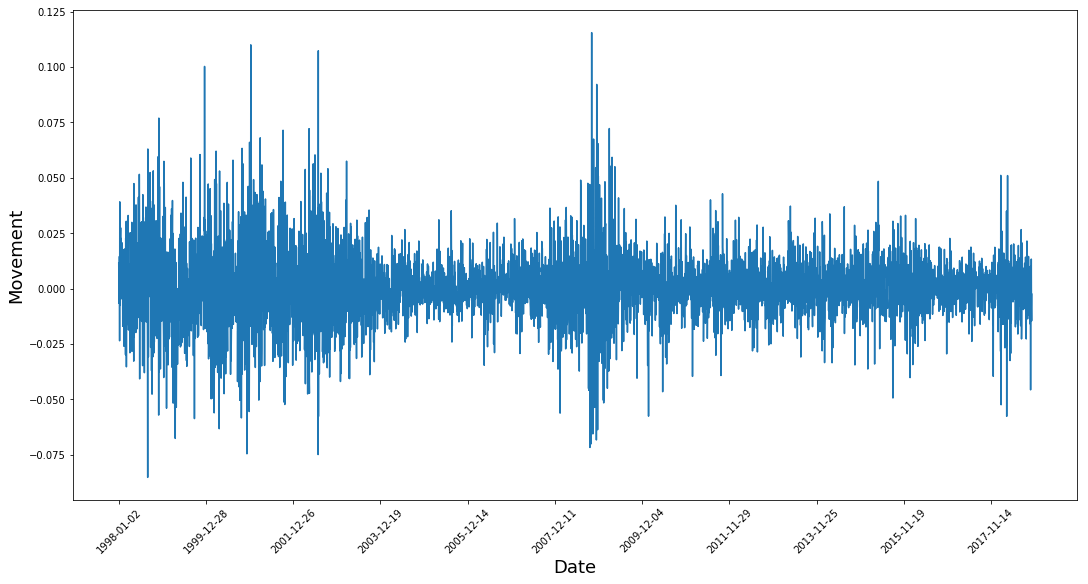

In [210]:
plt.figure(figsize = (18,9))
plt.plot(df['Movement'])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Movement',fontsize=18)
plt.show()

In [225]:

price_movement = df.loc[:,'Movement'].values
print(price_movement.shape)
price_movement = price_movement.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(price_movement)
price_movement= scaler.transform(price_movement)
price_movement.reshape(-1)
print(price_movement[4500:])
train_data = price_movement[:5000]
print(train_data)
test_data = price_movement[5000:]
print(test_data)

(5235,)
[[-1.60411360e-01]
 [-1.62204568e-01]
 [-1.62204568e-01]
 [-9.01728810e-02]
 [-2.24895308e-01]
 [-1.27093204e-01]
 [-1.85905798e-01]
 [-2.78400582e-03]
 [-1.71000883e-01]
 [-3.82914242e-01]
 [ 1.78513896e-01]
 [-1.47606401e-01]
 [-9.36746393e-02]
 [-2.21390929e-01]
 [-1.72775467e-01]
 [-2.69609971e-01]
 [-2.56549545e-03]
 [-2.33561442e-01]
 [-4.52882362e-02]
 [-2.67911462e-01]
 [-4.44308796e-01]
 [-1.60261651e-01]
 [-8.59217870e-02]
 [-1.29704449e-01]
 [-1.85085207e-01]
 [-4.31238077e-02]
 [-1.05137502e-01]
 [-1.79423308e-01]
 [-2.50790423e-01]
 [-6.30958768e-02]
 [-1.29403410e-01]
 [-2.00727105e-01]
 [-2.51429022e-01]
 [-1.58793513e-01]
 [-1.91044954e-01]
 [-1.47401178e-01]
 [-5.51388962e-01]
 [ 6.16022507e-02]
 [-2.13347369e-01]
 [-3.29321226e-01]
 [ 1.03691284e-02]
 [-2.52816117e-01]
 [ 1.94482359e-02]
 [-1.79967419e-01]
 [-7.80401638e-02]
 [-3.02590268e-01]
 [-1.13698309e-01]
 [-8.56117724e-02]
 [-1.82057944e-01]
 [-3.66479109e-01]
 [-3.55223177e-01]
 [-1.70312629e-01]
 [-4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


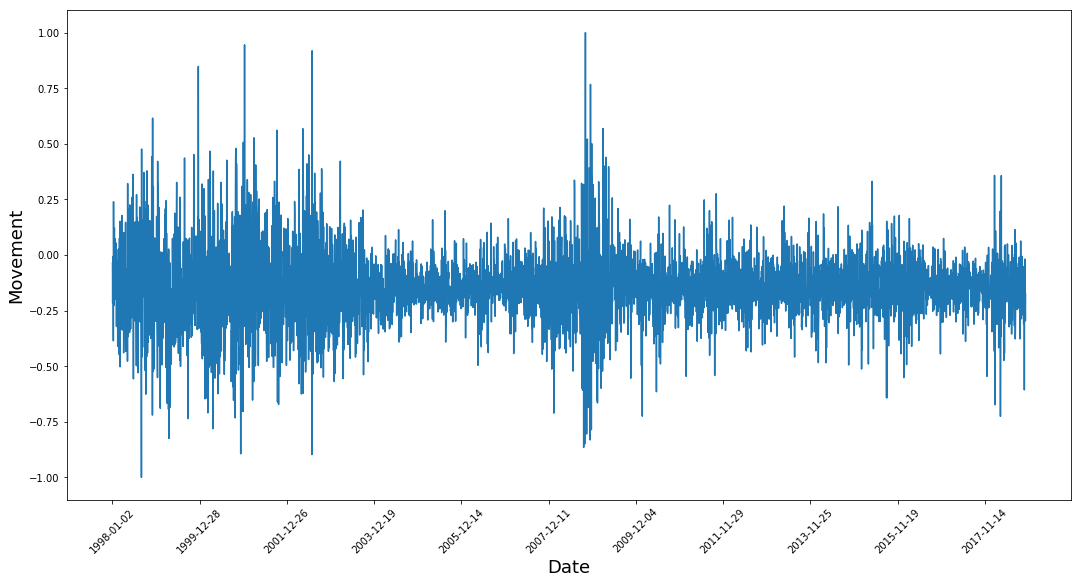

In [235]:
plt.figure(figsize = (18,9))
plt.plot(np.concatenate([train_data,test_data],axis=0))
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Movement',fontsize=18)
plt.show()

In [227]:
print(test_data)
print(train_data)

[[-8.55212509e-02]
 [-2.09696741e-01]
 [-1.39184470e-01]
 [-2.37525907e-01]
 [-1.35453379e-01]
 [-3.31135386e-02]
 [-2.36794597e-01]
 [-1.21158868e-01]
 [-8.41749918e-02]
 [-5.51382477e-02]
 [-3.12393349e-01]
 [-7.23989633e-02]
 [-7.24837753e-02]
 [-5.45561424e-01]
 [-1.20542504e-01]
 [-8.32217999e-04]
 [-1.57218251e-01]
 [-8.80071894e-02]
 [-4.00150649e-02]
 [-1.19631320e-01]
 [-1.96521439e-01]
 [-2.37524784e-01]
 [ 3.47149533e-02]
 [-2.35849819e-01]
 [-2.11208224e-01]
 [-2.29815087e-01]
 [-2.14892752e-01]
 [-1.38340298e-01]
 [-1.40663682e-01]
 [-1.44196906e-01]
 [-1.72067765e-01]
 [-1.61656745e-01]
 [-1.71434492e-01]
 [-1.17008572e-01]
 [-9.13178815e-02]
 [-9.09114317e-02]
 [-1.42138438e-01]
 [-1.99530834e-01]
 [-1.55718070e-01]
 [-1.56835242e-01]
 [-4.66304198e-02]
 [-3.44790289e-01]
 [-3.25644458e-02]
 [-1.17878623e-01]
 [-1.66661824e-01]
 [ 2.71396422e-02]
 [-1.51179863e-01]
 [-2.29805091e-01]
 [-1.65733511e-01]
 [-5.05561427e-02]
 [-2.79003793e-01]
 [-2.11010257e-01]
 [-1.7207643

In [214]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(4500):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [242]:

window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))
print(std_avg_predictions)

MSE error for standard averaging: 0.01315
[-0.12640374506066862, -0.12690621896057697, -0.12804590543881747, -0.12924872715234267, -0.12729552047451892, -0.13055559271381922, -0.12659780545721058, -0.13006012502585665, -0.13200305258391015, -0.12920381813435486, -0.13139288673644187, -0.1348570917042607, -0.13655838639178294, -0.13490554345810835, -0.13305147654329855, -0.1314509521173983, -0.13236643298562717, -0.13238025200438971, -0.13313943625866967, -0.12753801012514368, -0.12472777010987171, -0.13084188089440837, -0.1291888154124733, -0.1279505195785853, -0.12329986684068509, -0.124835711782113, -0.12528529084251358, -0.12567632901825923, -0.1252809392428063, -0.12410267264030148, -0.12248639310758767, -0.11803837581287863, -0.1150335993905459, -0.11611135965015512, -0.11469689949381506, -0.11611694229522382, -0.114249098048636, -0.11704472377988416, -0.12050761199792369, -0.11533634862867227, -0.1152013718946789, -0.11741702802325889, -0.11406107172121491, -0.11830236966463495, 

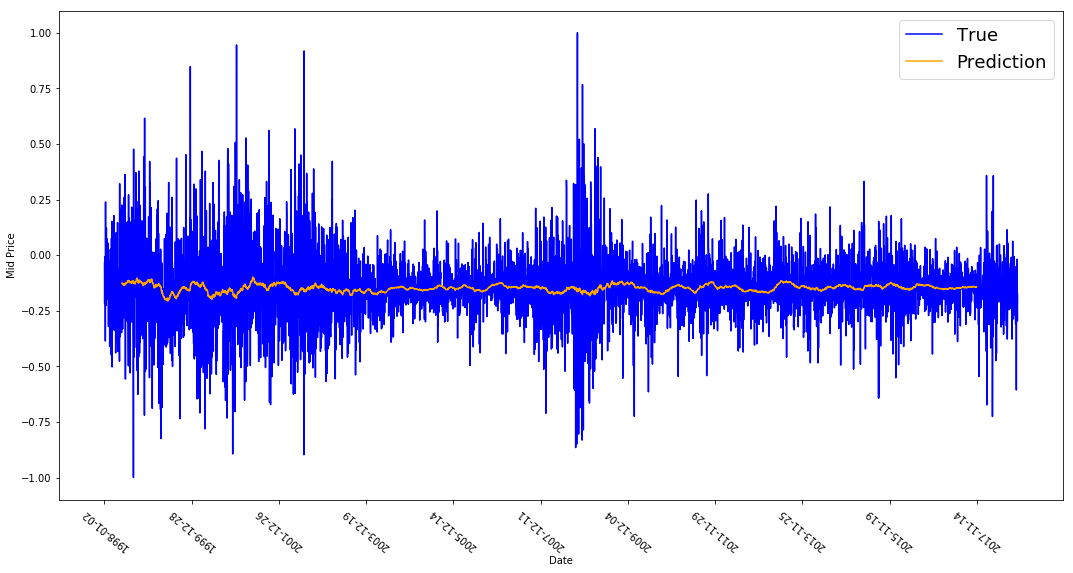

In [246]:
plt.figure(figsize = (18,9))
plt.plot(all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=500)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [247]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.01779


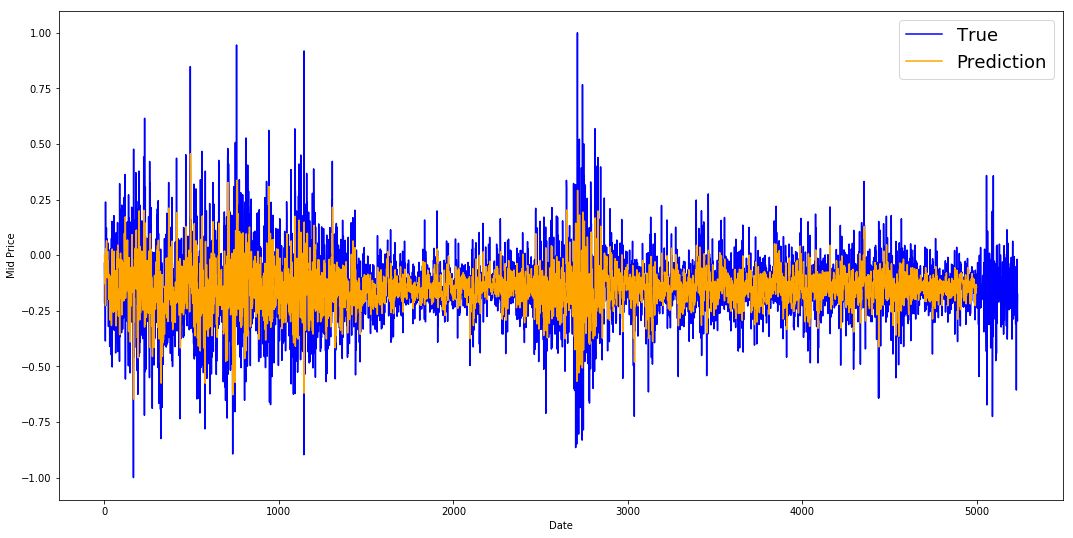

In [248]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [249]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [-0.03583421 -0.21741845 -0.24114531  0.01428097 -0.18093559]

	Output: [-0.00626437 -0.20377465 -0.24114531  0.01428097 -0.13922602]


Unrolled index 1
	Inputs:  [-0.2172546  -0.11273839 -0.20958626 -0.1911859  -0.09440427]

	Output: [-0.04516001 -0.17024226 -0.210076   -0.14783259 -0.11641029]


Unrolled index 2
	Inputs:  [-0.04516001 -0.17024226 -0.11795262 -0.1545204  -0.11641029]

	Output: [ 0.23916419 -0.17024226 -0.14746317 -0.1545204  -0.11641029]


Unrolled index 3
	Inputs:  [-0.17573957 -0.20377465 -0.210076   -0.17440023 -0.13922602]

	Output: [ 0.23916419 -0.38480887 -0.14746317 -0.07000032 -0.06947354]


Unrolled index 4
	Inputs:  [-0.00626437 -0.38480887 -0.14376307 -0.14783259 -0.22739314]

	Output: [-0.00626437 -0.09285148 -0.19596386 -0.09749735 -0.22739314]


In [2]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount
print(len(num_nodes))
tf.reset_default_graph() # This is important in case you run this multiple times

3


NameError: name 'tf' is not defined

In [4]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))



NameError: name 'li' is not defined

In [252]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

In [253]:
# Create cell state and hidden state variables to maintain the state of the LSTM
c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

In [254]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


In [255]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


In [256]:
epochs = 30
valid_summary = 1 # Interval you make test predictions

n_predict_once = 50 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(2000,4000,50).tolist()

for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 0.691334
	Test MSE: 0.01064
	Finished Predictions
Average loss at step 2: 0.554074
	Test MSE: 0.01033
	Finished Predictions
Average loss at step 3: 0.488020
	Test MSE: 0.01030
	Finished Predictions
Average loss at step 4: 0.467048
	Test MSE: 0.01030
	Finished Predictions
Average loss at step 5: 0.520913
	Test MSE: 0.01030
	Finished Predictions
Average loss at step 6: 0.527754
	Test MSE: 0.01029
	Finished Predictions
Average loss at step 7: 0.489745
	Test MSE: 0.01029
	Finished Predictions
Average loss at step 8: 0.487309
	Test MSE: 0.01029
	Finished Predictions
Average loss at step 9: 0.568305
	Decreasing learning rate by 0.5
	Test MSE: 0.01029
	Finished Predictions
Average loss at step 10: 0.637307
	Test MSE: 0.01029
	Finished Predictions
Average loss at step 11: 0.614061
	Test MSE: 0.01029
	Finished Predictions
Average loss at step 12: 0.551262
	Decreasing learning rate by 0.5
	Test MSE: 0.01029
	Finished Predictions
Average loss at step 13: 0.4760

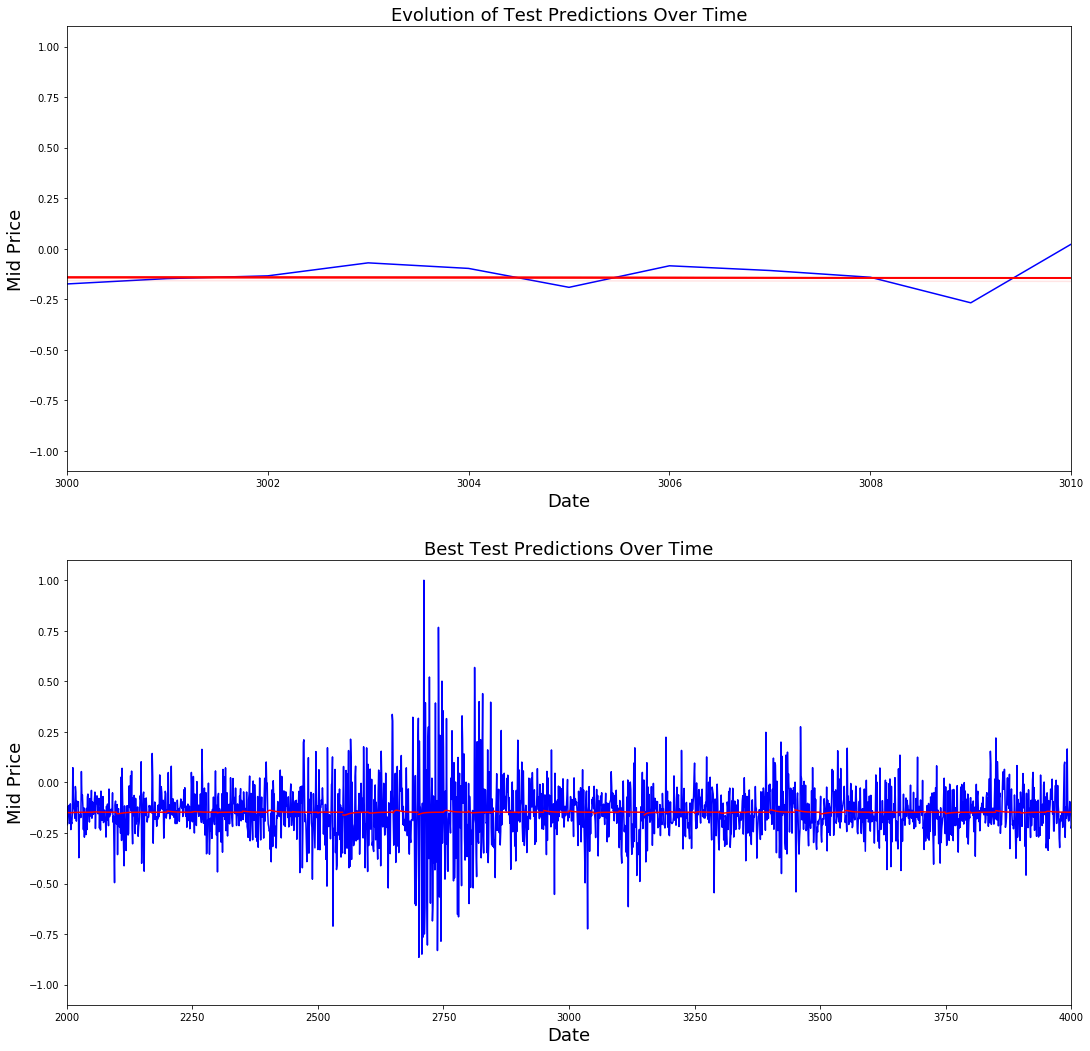

In [261]:
best_prediction_epoch = 25 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.1
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(3000,3010)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(2000,4000)
plt.show()

In [143]:
print(train_mse_ot)

[3.038609597418043, 0.44374123877949184, 0.15487462861670387, 0.07328034813205402, 0.05244652057687441, 0.04625734231538243, 0.04256512597203255, 0.03728580764598317, 0.03400260251429346, 0.030980704973141353, 0.02863572682771418, 0.0274146499319209, 0.027314502538906202, 0.02716611698269844, 0.026816121199064784, 0.02652722369465563, 0.026242816199858982, 0.025304742985301547, 0.02482253106104003, 0.02353701326582167, 0.022272809305124812, 0.022664552554488182, 0.022099616212977305, 0.022450124844908714, 0.022855487548642688, 0.02342974663608604, 0.023723989725112915, 0.022992457987533674, 0.022309045617779095, 0.02262062082688014]


In [147]:
print(predictions_over_time[25][0])

[0.42206654 0.42211899 0.422133   0.42212522 0.42210713 0.42208651
 0.42206839 0.42205542 0.42204902 0.42204955 0.42205682 0.42207012
 0.42208871 0.42211178 0.42213839 0.4221679  0.42219955 0.42223287
 0.42226738 0.42230266 0.42233852 0.42237461 0.42241091 0.4224472
 0.42248347 0.42251959 0.42255566 0.42259151 0.42262727 0.42266276
 0.42269817 0.42273343 0.4227685  0.42280343 0.42283815 0.4228729
 0.42290738 0.42294174 0.42297602 0.42301017 0.42304417 0.42307806
 0.42311183 0.4231455  0.42317894 0.42321238 0.42324558 0.42327875
 0.42331177 0.42334458]
